# PV Plant Exploratory Data Analysis

In this Notebook, we are going to explore the weather and power generation data of a dataset from Kaggle. The goal is to try and figure out some patterns as well as some important indicators and trends, that arise in this plant's power generation. We are also going to try and identify any inverters that underperform, so they can get the attention they need.

The image bellow, is of the project in Pirapora, Brazil. I was providing surveying support for the plant. Renewable energy is a passion of mine, so this personal project is important to me. Thank you for viewing, I hope you enjoy.

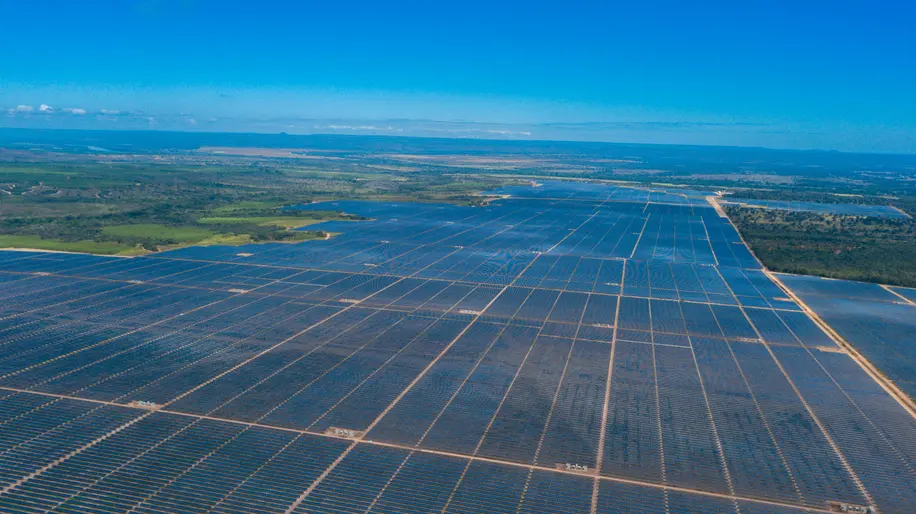

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm

%matplotlib inline

## Let's take a look at the provided Datasets.

In [2]:
p1_gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
p1_weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

p1_gen_data['DATE_TIME'] = pd.to_datetime(p1_gen_data['DATE_TIME'], format = '%d-%m-%Y %H:%M')
p1_weather_data['DATE_TIME'] = pd.to_datetime(p1_weather_data['DATE_TIME'], format = '%Y-%m-%d %H:%M:%S')

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
p1_gen_data.head(30)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15 00:00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15 00:00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15 00:00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15 00:00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15 00:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [5]:
p1_weather_data.head(30)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.000000
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.000000
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.000000
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.000000
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.000000
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.000000
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.000000
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.000000
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.000000


In [6]:
p1_gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
p1_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


## Next up, some EDA on the weather station data

In [8]:
p1_weather_data['DATE'] = p1_weather_data['DATE_TIME'].dt.date
p1_weather_data['TIME'] = p1_weather_data['DATE_TIME'].dt.time

In [9]:
df_weather = p1_weather_data.groupby('DATE').mean().reset_index()

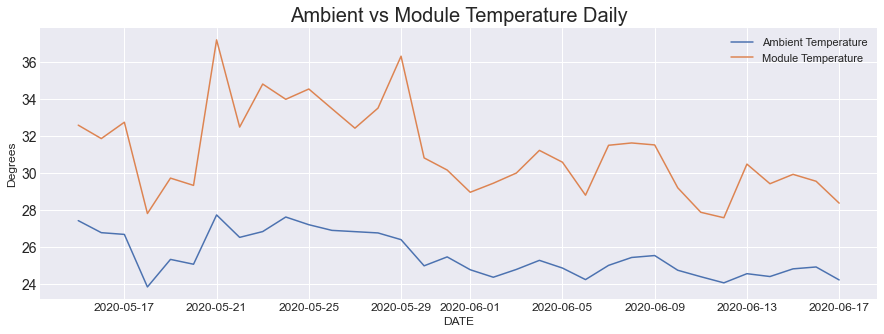

In [27]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=df_weather.DATE, y=df_weather.AMBIENT_TEMPERATURE, linewidth = 1.5 , label = 'Ambient Temperature')
sns.lineplot(x=df_weather.DATE, y=df_weather.MODULE_TEMPERATURE, linewidth = 1.5 , label = 'Module Temperature')
plt.title("Ambient vs Module Temperature Daily",fontsize = 20)
plt.ylabel('Degrees')
plt.show()

As we can see, the weather station's module temperature is always higher than the ambient temperature. It generally follows the ambient's trend. 

There are only two spikes that do not follow the ambient temperatures between 27th and 29th of May 2021

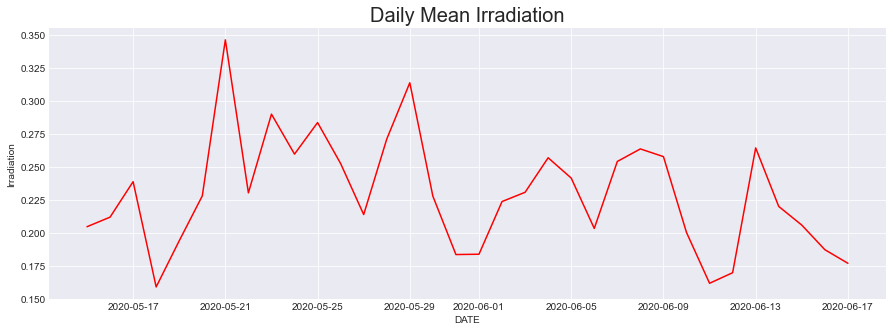

In [11]:
fig, ax = plt.subplots(figsize=(15,5))

plt.style.use('seaborn-darkgrid')
fig = sns.lineplot(x='DATE', y='IRRADIATION', data=df_weather, color='red')

fig.set_title('Daily Mean Irradiation', size=20)
fig.set_ylabel('Irradiation')
plt.show()

Irradiation's trends follow module temperature trends, almost perfectly. Safe to assume that the 28th and 29th of May, were colder but bright days.

In [12]:
df_weather_time = p1_weather_data.groupby('TIME').mean().reset_index()
df_weather_time.drop(columns=['PLANT_ID', 'IRRADIATION'],inplace=True)


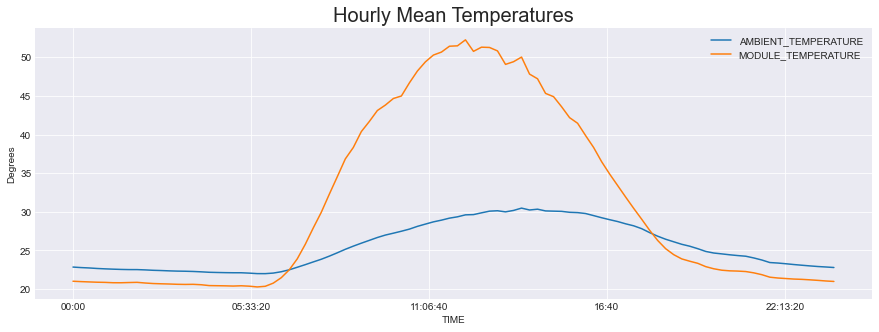

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
plt.style.use('seaborn-darkgrid')
fig = df_weather_time.plot(x='TIME', ax=ax)
fig.set_title('Hourly Mean Temperatures', size=20)
fig.set_ylabel('Degrees')
plt.show()

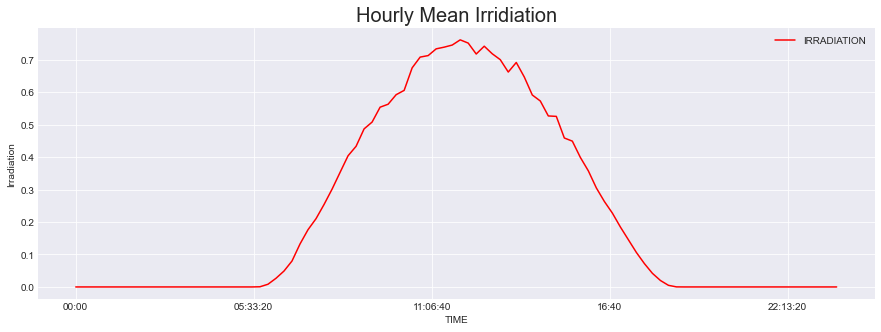

In [14]:
df_weather_time = p1_weather_data.groupby('TIME').mean().reset_index()
fig, ax = plt.subplots(figsize=(15,5))
fig = df_weather_time.plot(x='TIME', y='IRRADIATION', color='red', ax=ax)

fig.set_title('Hourly Mean Irridiation', size=20)
fig.set_ylabel('Irradiation')
plt.show()

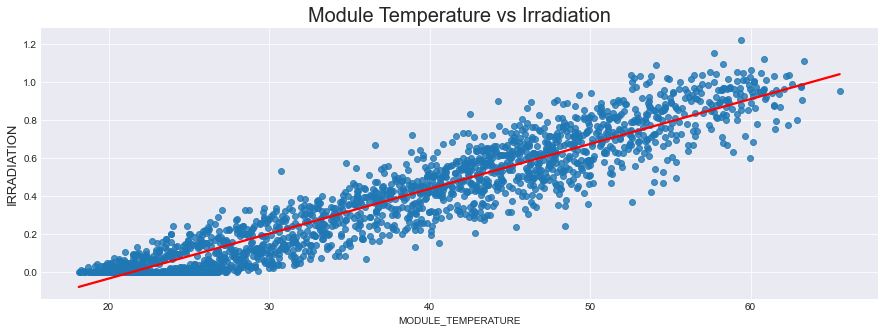

In [15]:
plt.figure(figsize=(15,5))
sns.regplot(x=p1_weather_data.MODULE_TEMPERATURE, y=p1_weather_data.IRRADIATION, line_kws={'color':'r'}, ci=.955)
plt.title("Module Temperature vs Irradiation",fontsize = 20)
plt.ylabel('IRRADIATION', size=13)
plt.style.use('seaborn-darkgrid')
plt.show()

In [16]:
p1_weather_data.corr()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,NaN,1.000000,0.853778,0.722999
MODULE_TEMPERATURE,NaN,0.853778,1.000000,0.961566
IRRADIATION,NaN,0.722999,0.961566,1.000000


A 96.1% correlation between module temperature and irradiation.

## Some EDA on the plant's power generation data

#### Let's see how dc power is affected by our weather data

In [17]:
p1_gen_data['DATE'] = p1_gen_data['DATE_TIME'].dt.date

p1_gen_data['TIME'] = p1_gen_data['DATE_TIME'].dt.time

df_gen = p1_gen_data.groupby('DATE').sum().reset_index()


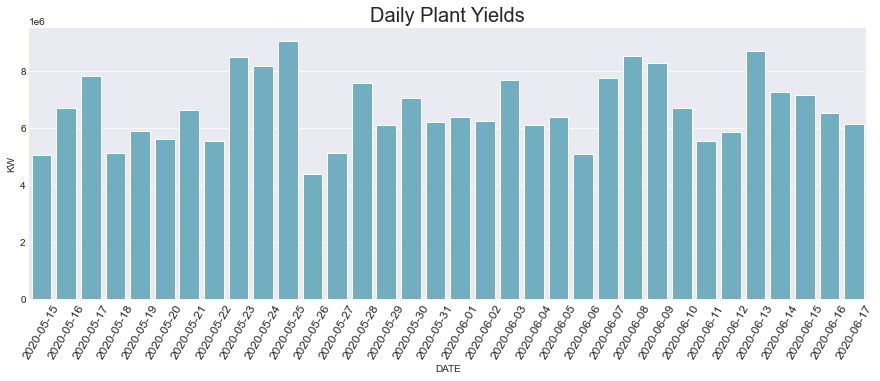

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(rc={"axes.facecolor":"beige", "axes.grid":False,'xtick.labelsize':12,'ytick.labelsize':14})
fig = sns.barplot(x='DATE', y='DAILY_YIELD', data=df_gen, color='c')
fig.set_xticklabels(labels=df_gen.DATE, rotation=60, size=12)
fig.set_title('Daily Plant Yields', size=20)
fig.set_ylabel('KW')
plt.show()

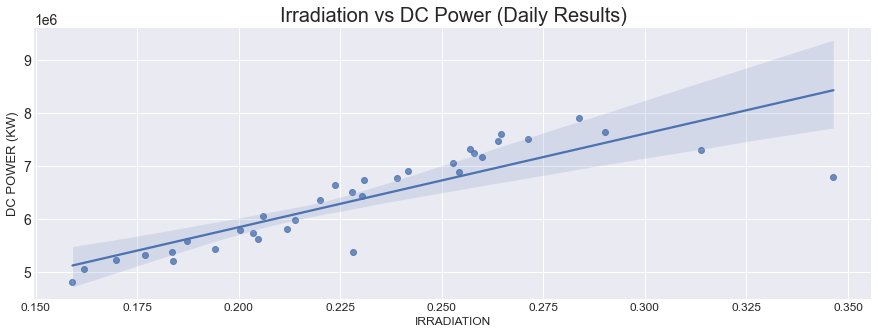

In [28]:
plt.figure(figsize=(15,5))
sns.regplot(x=df_weather.IRRADIATION, y=df_gen.DC_POWER)
plt.title("Irradiation vs DC Power (Daily Results)",fontsize = 20)
plt.ylabel('DC POWER (KW)', size=13)
plt.style.use('seaborn-darkgrid')
plt.show()

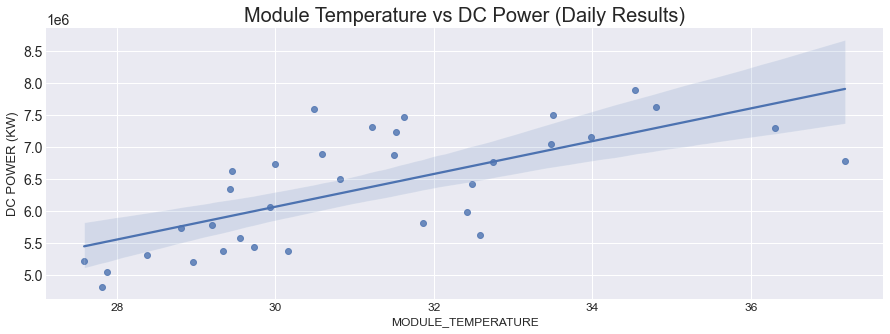

In [20]:
plt.figure(figsize=(15,5))
sns.regplot(x=df_weather.MODULE_TEMPERATURE, y=df_gen.DC_POWER, order=1)
plt.title("Module Temperature vs DC Power (Daily Results)",fontsize = 20)
plt.ylabel('DC POWER (KW)', size=13)
plt.style.use('seaborn-darkgrid')
plt.show()

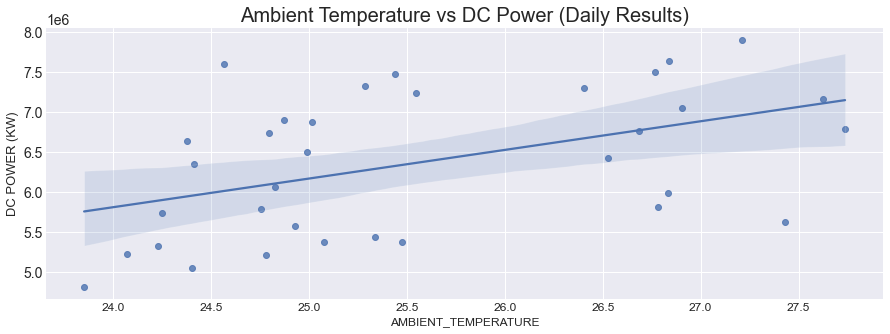

In [21]:
plt.figure(figsize=(15,5))
sns.regplot(x=df_weather.AMBIENT_TEMPERATURE, y=df_gen.DC_POWER, order=1)
plt.title("Ambient Temperature vs DC Power (Daily Results)",fontsize = 20)
plt.ylabel('DC POWER (KW)', size=13)
plt.style.use('seaborn-darkgrid')
plt.show()

DC power has a positive correlation with all weather data. But the best fit is with Irradiation.

#### Let's see the relationship between DC and AC

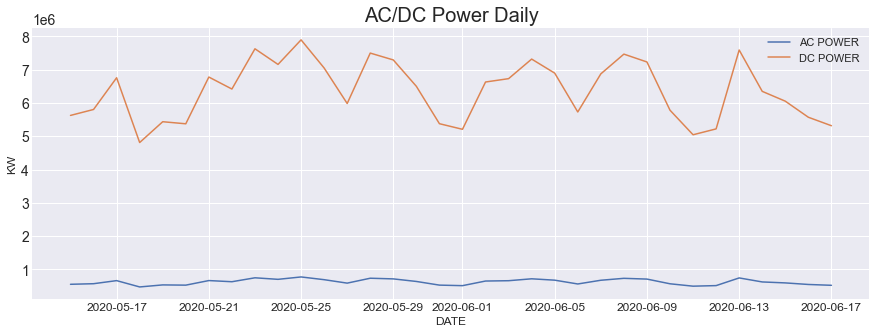

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_gen.DATE, y=df_gen.AC_POWER, linewidth = 1.5 , label = 'AC POWER')
sns.lineplot(x=df_gen.DATE, y=df_gen.DC_POWER, linewidth = 1.5 , label = 'DC POWER')
plt.title("AC/DC Power Daily",fontsize = 20)
plt.ylabel('KW')
plt.style.use('seaborn-darkgrid')
plt.show()

This graph illustrates that there is a big difference between DC power and AC power. Let's go deeper.

In [23]:
losses = pd.DataFrame([df_gen['DATE'],(df_gen['AC_POWER'] / df_gen['DC_POWER']) * 100])
losses = losses.transpose()
losses.rename(columns={'Unnamed 0':'losses'}, inplace=True)

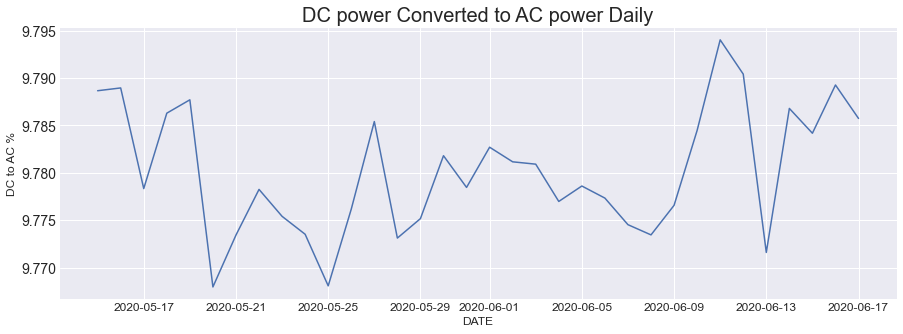

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
fig = sns.lineplot(x='DATE', y='losses', data=losses)
fig.set_title('DC power Converted to AC power Daily', size=20)
fig.set_ylabel('DC to AC %')
plt.style.use('seaborn-darkgrid')
plt.show()

Only ~10% of the direct current gets converted to alternating current.

#### Let's see if we can identify any underperforming inverters

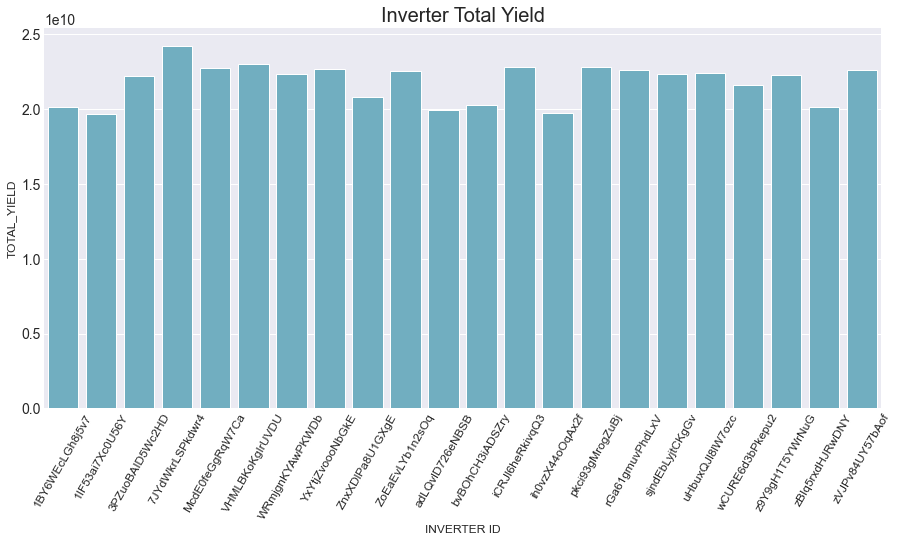

In [25]:
inverters = p1_gen_data.groupby('SOURCE_KEY').sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=inverters.SOURCE_KEY, y=inverters.TOTAL_YIELD, color='c')
plt.xticks(rotation=60)
plt.xlabel('INVERTER ID')
plt.title('Inverter Total Yield', size=20)
plt.style.use('seaborn-darkgrid')
plt.show()

Some inverters have a lower total yield. Namely:


-1BY6WEcLGh8j5v7


-1IF53ai7Xc0U56Y


-adLQvlD726eNBSB


-bvBOhCH3iADSZry


-ih0vzX44oOqAx2f


-zBIq5rxdHJRwDNY

#### Let's go deeper in order to identify which inverters have been underperforming in the last month

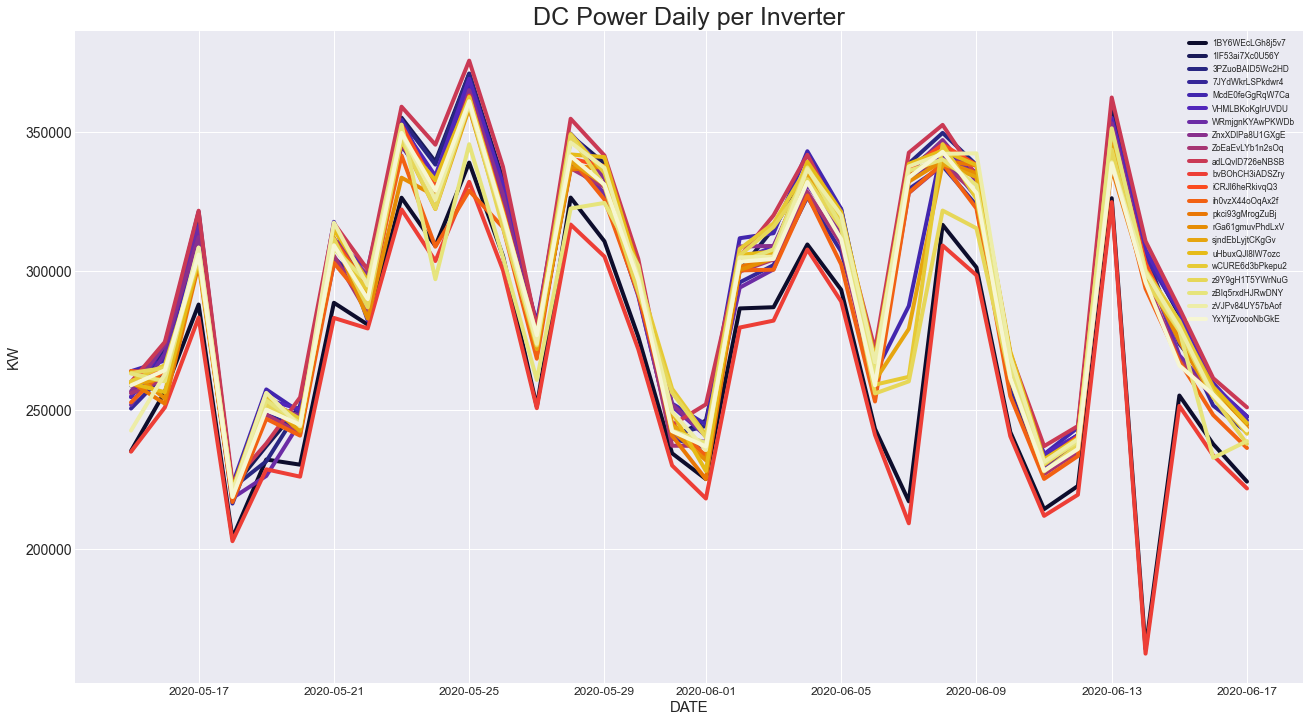

In [26]:
inverter_list = p1_gen_data['SOURCE_KEY'].unique()

p1_gen_data_inverter_index = p1_gen_data.set_index('SOURCE_KEY')

plt.figure(figsize=(22,12))

cmap = sns.color_palette("CMRmap", n_colors=22)

i = 0
for inverter in inverter_list:
    group = p1_gen_data_inverter_index.loc[inverter]
    group_sum = group.groupby('DATE').sum()
    sns.lineplot(x='DATE',y='DC_POWER', data=group_sum, linewidth=4, color=cmap[i], label=inverter)
    i = i+1
    
plt.title("DC Power Daily per Inverter",fontsize = 25)
plt.ylabel('KW', size=15)
plt.xlabel('DATE', size=15)
plt.legend(fontsize='x-small')
plt.style.use('seaborn-white')
plt.show()


There are two inverters consistently and - at cases - severely underperforming.


-1BY6WEcLGh8j5v7


-bvBOhCH3iADSZry

